In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio
import fb_utils as fb
import importlib

In [16]:
# set parameters

# signal length
N = 1024
# filter lengths
T_vals = 2**np.arange(3,10)
# number of filters
J = 256
# quantile
p = 0.05

In [17]:
# load filters
Psi = np.load('filters/aud_512.npy')
Psi = Psi.real
Psi.shape, fb.frame_bounds(Psi)

((256, 512), (0.999999999999997, 1.000000000000002))

In [18]:
# artificial signals

# impulse
x_impulse = np.zeros(N)
x_impulse[513] = 1
x_impulse = x_impulse/np.linalg.norm(x_impulse)

# brownian noise
x_rand = fb.brownian_noise(N,0.15)
x_rand = x_rand/np.linalg.norm(x_rand)

# sine
x_sine = (-np.ones(N)**np.arange(N))/np.sqrt(N)
x_sine = x_sine/np.linalg.norm(x_sine)

xs = [x_impulse, x_rand, x_sine]

In [19]:
plt.rcParams.update({
    'font.size': 10,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})
plt.rcParams["font.family"] = "Times New Roman"

In [59]:
importlib.reload(fb)

<module 'fb_utils' from '/Users/Dane/GitHub/Random-Filterbanks/Hybrid Filterbanks/fb_utils.py'>

In [60]:
w = np.random.randn(256, 512)/np.sqrt(512)
w_pad = np.pad(w, ((0,0),(0, 1024-512)), constant_values=0)
Psi_pad = np.pad(Psi, ((0,0),(0, 1024-512)), constant_values=0)

In [61]:
y = 0
for ii in range(J):
    y += np.linalg.norm(np.fft.ifft(np.fft.fft(x_impulse) * np.fft.fft(Psi_pad)[ii,:] * np.fft.fft(w_pad)[ii,:]))**2
print(y)

1.047500998520893


In [72]:
fb.random_hybrid_filterbank_energy(x_impulse, Psi, 1024, 1024)

1.0194905619050654

In [75]:
J = 256
T = [16]
num = 500

Y = np.zeros((3, num))

for x_id, x in enumerate(xs):
    Y[x_id,:] = fb.random_filterbank_experiment(x, Psi, N, T, num)

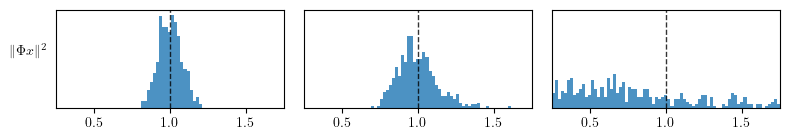

In [76]:
titles = ['impulse', 'brown', 'sine']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 1.5), sharey='row')

for x_id, x in enumerate(xs):
    ax = axes[x_id]
    ax.hist(Y[x_id,:], range=[0.25,1.75], bins=75, density=True, alpha=0.8)
    ax.axvline(1, color = 'black', label = 'axvline - full height', alpha=0.8, linewidth=1, linestyle='--')
    ax.set_yticks([])
    ax.set_xlim(0.25, 1.75)

    axes[0].set_ylabel('$\Vert \Phi x \Vert^2$', rotation='horizontal', labelpad=16)

plt.tight_layout()

#plt.savefig('plots/energy.pdf', bbox_inches='tight')

In [100]:
# real world examples

# snare

drums_full = librosa.load('signals/snare.wav')
drums = drums_full[0][:22050]
drums[15000:] = 0
drums = drums/np.linalg.norm(drums)

# speech

speech_full = librosa.load('signals/speech.wav')
speech = speech_full[0][:22050]
speech= speech/np.linalg.norm(speech)

# flute

flute_full = librosa.load('signals/flute.wav')
flute = flute_full[0][1000:1000+22050]
flute = flute/np.linalg.norm(flute)

xs_real = [drums, speech, flute]
N_real = drums.shape[0]

In [102]:
J = 256
T = [512]
num = 1000

Y = np.zeros((3, num))

for x_id, x in enumerate(xs_real):
    Y[x_id,:] = fb.random_filterbank_experiment(x, Psi, N_real, T, num)

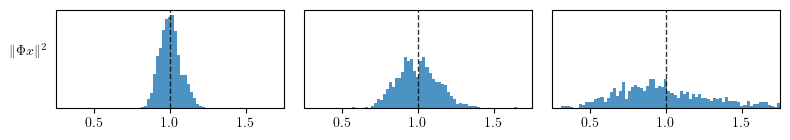

In [103]:
titles = ['snare', 'speech', 'flute']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 1.5), sharey='row')

for x_id, x in enumerate(xs_real):
    ax = axes[x_id]
    ax.hist(Y[x_id,:], range=[0.25,1.75], bins=75, density=True, alpha=0.8)
    ax.axvline(1, color = 'black', label = 'axvline - full height', alpha=0.8, linewidth=1, linestyle='--')
    ax.set_yticks([])
    ax.set_xlim(0.25, 1.75)

    axes[0].set_ylabel('$\Vert \Phi x \Vert^2$', rotation='horizontal', labelpad=16)

plt.tight_layout()

#plt.savefig('plots/energy.pdf', bbox_inches='tight')